#                                      Capstone team 5 Notebook   


## This problem statement of this case study is using various measurements given we need to predict the type of activities the user engages in 
## So the target variable here is the activityID and the rest are independent variables

### Data Description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
df = pd.read_csv('physical_activity.csv')

In [4]:
df.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


In [5]:
df.shape

(2864056, 33)

#### There are around 2 million rows and 33 variables in this dataset 

In [7]:
df.isnull().sum()

activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetometer X          0
ankle magnetometer Y          0
ankle ma

#### Only the varaible heart_rate has null values in this dataset. So for now we are replacing the null values with the variable's median to proceed with further analysis. After further analysis, getting some understanding of the data we shall try imputing the null logically and also by using in-built imputers such as knn imputers

In [8]:
df['heart_rate']=df['heart_rate'].fillna(df['heart_rate'].median())

In [9]:
df.isnull().sum()

activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
PeopleId

In [9]:
text = 'Number of people whose measurements are taken is'

In [10]:
from IPython.display import display, Markdown
Markdown('<strong>{} {} </strong><br/>'.format(text, (len(df['PeopleId'].unique()))))

<strong>Number of people whose measurements are taken is 8 </strong><br/>

#### The datatypes of the variables are

In [11]:
df.dtypes

activityID                    object
heart_rate                   float64
hand temperature (°C)        float64
hand acceleration X ±16g     float64
hand acceleration Y ±16g     float64
hand acceleration Z ±16g     float64
hand gyroscope X             float64
hand gyroscope Y             float64
hand gyroscope Z             float64
hand magnetometer X          float64
hand magnetometer Y          float64
hand magnetometer Z          float64
chest temperature (°C)       float64
chest acceleration X ±16g    float64
chest acceleration Y ±16g    float64
chest acceleration Z ±16g    float64
chest gyroscope X            float64
chest gyroscope Y            float64
chest gyroscope Z            float64
chest magnetometer X         float64
chest magnetometer Y         float64
chest magnetometer Z         float64
ankle temperature (°C)       float64
ankle acceleration X ±16g    float64
ankle acceleration Y ±16g    float64
ankle acceleration Z ±16g    float64
ankle gyroscope X            float64
a

In [12]:
text_1 = 'Number of activities for which the measurements are takes is'

In [13]:
Markdown('<strong>{} {} </strong><br/>'.format(text_1, (len(df['activityID'].unique()))))

<strong>Number of activities for which the measurements are takes is 13 </strong><br/>

<AxesSubplot:>

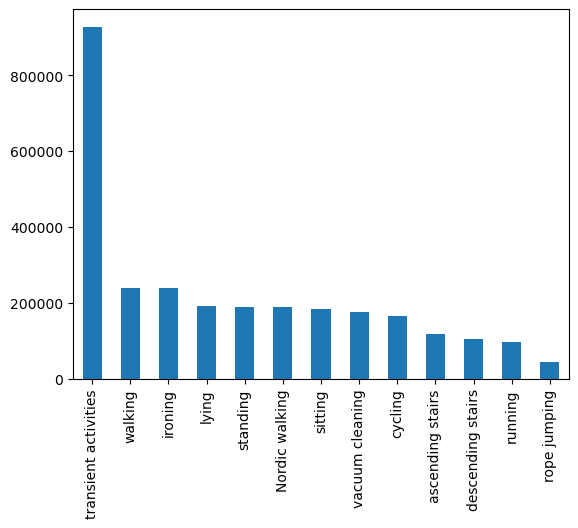

In [14]:
df['activityID'].value_counts().plot(kind = 'bar')

In [15]:
df['activityID'].value_counts()

transient activities    927575
walking                 238761
ironing                 238690
lying                   192523
standing                189931
Nordic walking          188107
sitting                 185188
vacuum cleaning         175353
cycling                 164600
ascending stairs        117216
descending stairs       104944
running                  98199
rope jumping             42969
Name: activityID, dtype: int64

#### From the graph and the value counts you can see that the target variable activity ID is highly imbalanced with most of the datapoints disproportionately belonging to the transient activites class so we will be balancing the classes in the variable later during the model building stage of the project

In [16]:
df.describe()

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
count,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,...,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06
mean,1.097702e+02,3.267050e+01,-4.978788e+00,3.575225e+00,3.174904e+00,-3.881062e-03,3.213164e-02,-6.985945e-03,2.125344e+01,-1.432121e+01,...,9.547292e+00,-1.251156e-01,-2.459224e+00,8.153172e-03,-3.430653e-02,6.899129e-03,-3.272317e+01,1.635810e+00,1.691927e+01,4.487160e+00
std,2.583110e+01,1.800771e+00,5.989589e+00,6.260608e+00,3.828842e+00,1.298024e+00,8.842820e-01,1.453340e+00,2.402693e+01,2.409430e+01,...,5.674253e+00,6.816935e+00,3.523211e+00,1.070971e+00,5.953280e-01,1.842663e+00,1.888977e+01,2.159774e+01,2.031745e+01,2.357792e+00
min,5.700000e+01,2.743750e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.780440e+01,-2.221270e+01,-1.669970e+01,-1.039410e+02,-2.000430e+02,...,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,1.000000e+00
25%,9.000000e+01,3.143750e+01,-9.038570e+00,1.294029e+00,9.735957e-01,-3.477418e-01,-1.970635e-01,-3.028935e-01,5.345607e+00,-2.951722e+01,...,9.030297e+00,-1.756760e+00,-3.643863e+00,-1.528980e-01,-8.216113e-02,-3.097942e-01,-4.290010e+01,-1.140080e+01,3.293130e+00,2.000000e+00
50%,1.080000e+02,3.312500e+01,-5.818260e+00,3.568640e+00,2.961145e+00,-6.158165e-03,6.137100e-03,-5.385480e-03,2.428385e+01,-1.645440e+01,...,9.573050e+00,-2.717770e-01,-2.357330e+00,4.215460e-03,-4.229060e-03,-2.273390e-03,-3.389515e+01,1.419830e+00,1.816660e+01,5.000000e+00
75%,1.250000e+02,3.400000e+01,-8.020333e-01,6.588192e+00,5.996195e+00,3.030542e-01,2.366580e-01,2.924292e-01,3.925000e+01,1.765928e+00,...,1.000520e+01,1.253742e+00,-1.062060e+00,9.399325e-02,8.283495e-02,6.281400e-02,-1.905550e+01,1.734970e+01,3.091070e+01,7.000000e+00
max,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.569490e+02,2.641580e+01,1.698350e+01,1.433840e+01,1.725900e+02,1.211760e+02,...,1.572320e+02,1.572930e+02,1.588720e+02,1.742040e+01,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,8.000000e+00


In [34]:
outlier = df.drop(['activityID','PeopleId'],axis = 1).columns.to_list()

In [41]:
outlier

['heart_rate',
 'hand temperature (°C)',
 'hand acceleration X ±16g',
 'hand acceleration Y ±16g',
 'hand acceleration Z ±16g',
 'hand gyroscope X',
 'hand gyroscope Y',
 'hand gyroscope Z',
 'hand magnetometer X',
 'hand magnetometer Y',
 'hand magnetometer Z',
 'chest temperature (°C)',
 'chest acceleration X ±16g',
 'chest acceleration Y ±16g',
 'chest acceleration Z ±16g',
 'chest gyroscope X',
 'chest gyroscope Y',
 'chest gyroscope Z',
 'chest magnetometer X',
 'chest magnetometer Y',
 'chest magnetometer Z',
 'ankle temperature (°C)',
 'ankle acceleration X ±16g',
 'ankle acceleration Y ±16g',
 'ankle acceleration Z ±16g',
 'ankle gyroscope X',
 'ankle gyroscope Y',
 'ankle gyroscope Z',
 'ankle magnetometer X',
 'ankle magnetometer Y',
 'ankle magnetometer Z']

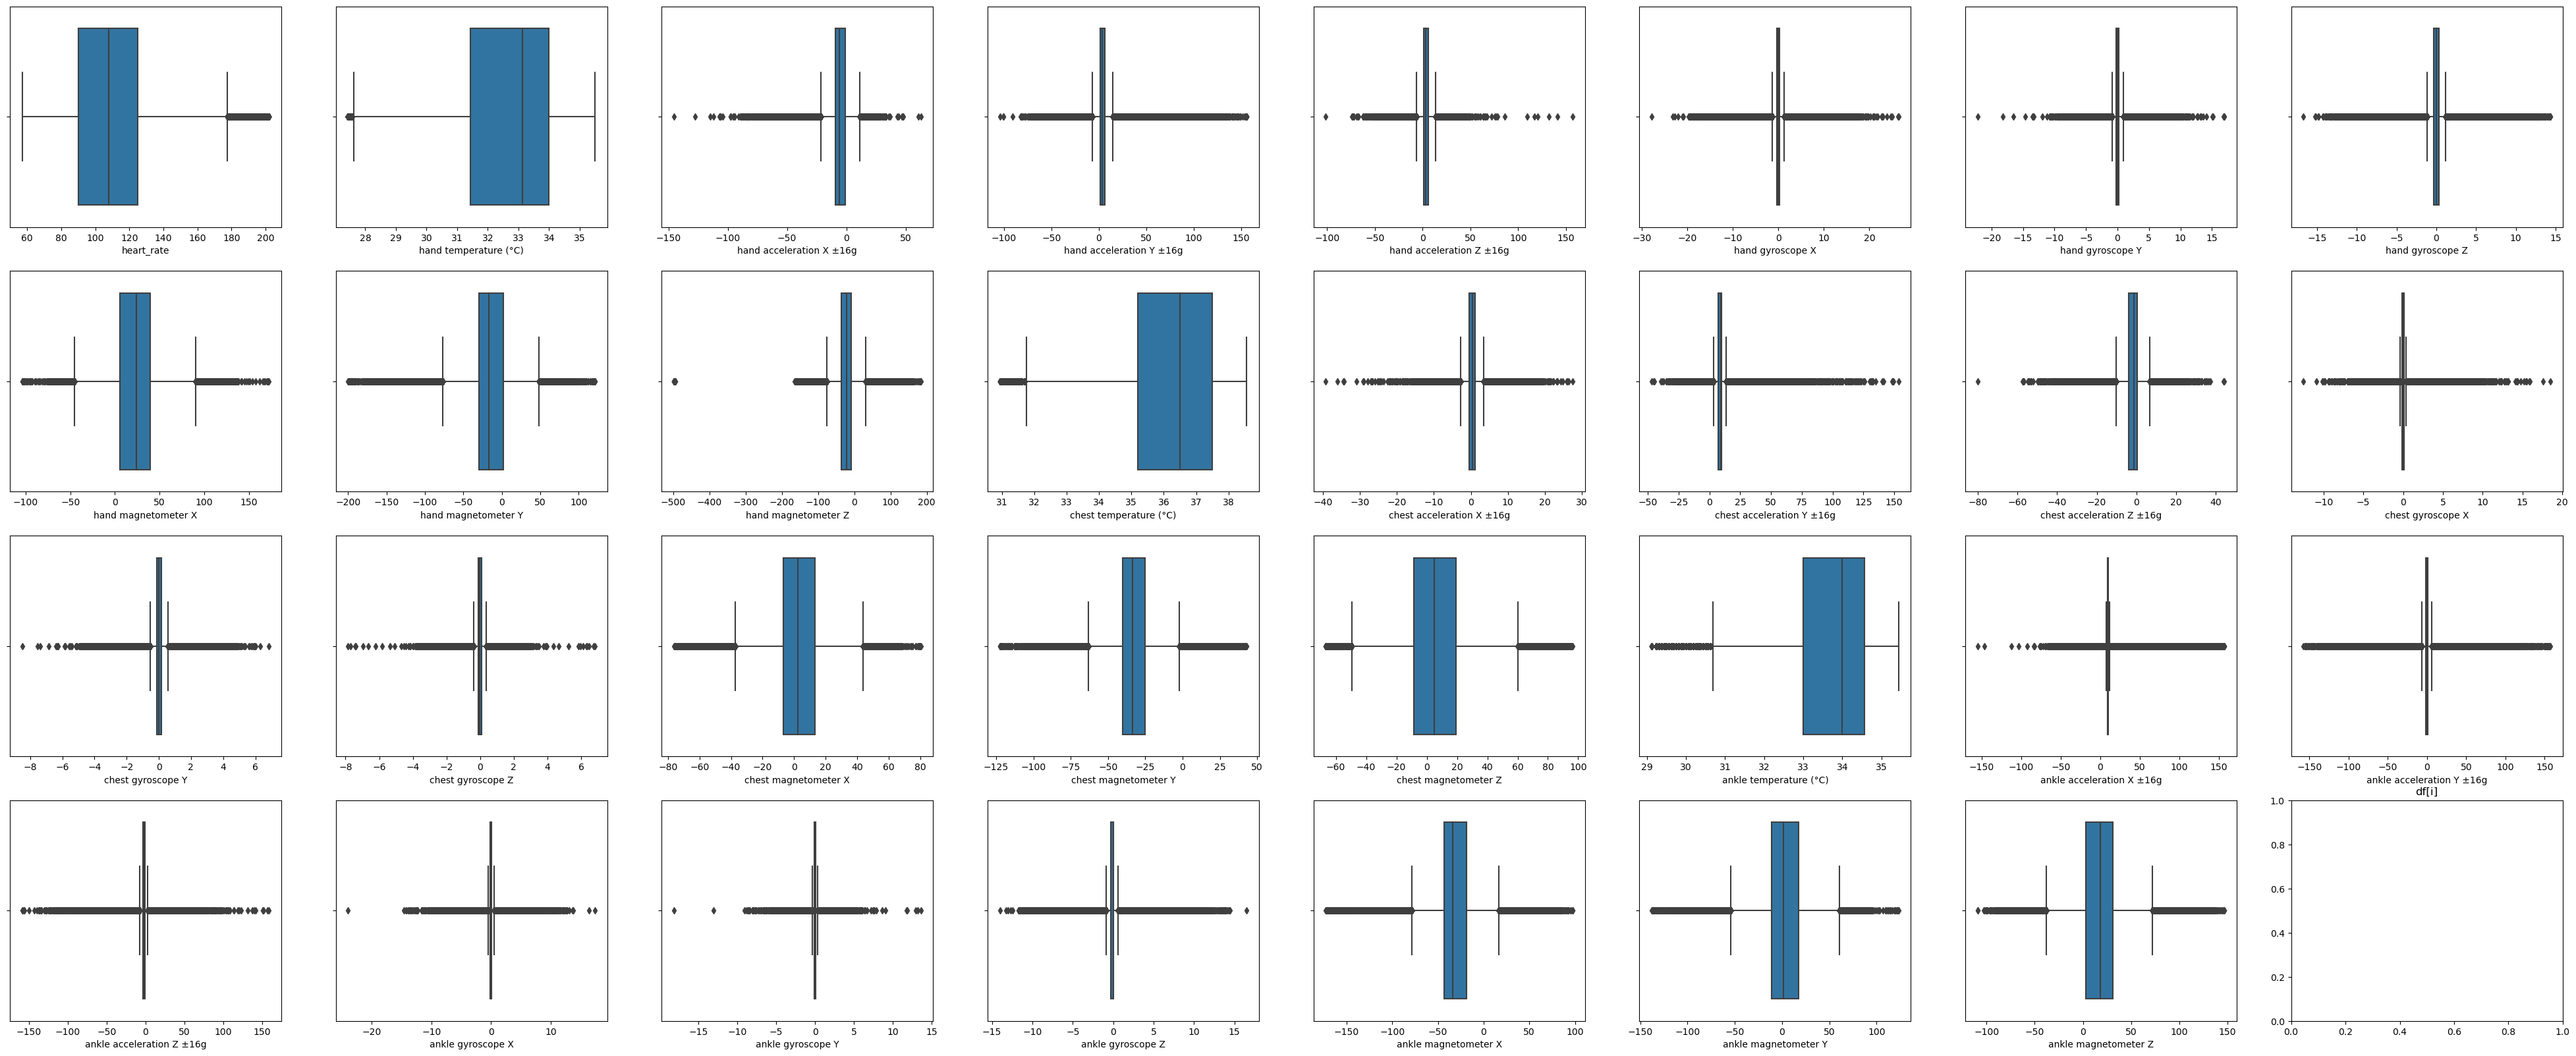

In [39]:
fig,ax = plt.subplots(4,8,figsize = (50,20))
for i,subplot in zip(outlier,ax.flatten()):
    sns.boxplot(df[i],ax = subplot)
    plt.title('df[i]')
    
plt.show()

#### All the variables do have outliers so for now we are going to perform transformation of these variables and build a model to see the effect of this operation 
#### Refer below in the model building section to see the working

### Exploratory Data Analysis

#### We are going to be breaking down the Exploratory data analysis based on the body part measurements since there are 33 variables in the dataset this can help us in getting a clear understanding of the data
#### Body parts that are being measured in this dataset are i.e hand,ankle,chest and heart

##### Hand measurements

In [15]:
hand = df[['hand acceleration X ±16g','hand acceleration Y ±16g','hand acceleration Z ±16g', 
    'hand temperature (°C)',
    'hand gyroscope X', 'hand gyroscope Y','hand gyroscope Z',
    'hand magnetometer X','hand magnetometer Y','hand magnetometer Z']].columns.to_list()

In [16]:
for i in hand:
    print(i,df[i].skew())

hand acceleration X ±16g -0.2851467536268684
hand acceleration Y ±16g 2.11550879932569
hand acceleration Z ±16g -0.5255447638935343
hand temperature (°C) -0.813726980569423
hand gyroscope X 0.08695216874832154
hand gyroscope Y 0.5919199895845751
hand gyroscope Z -0.19535542545095416
hand magnetometer X -0.4759573861114256
hand magnetometer Y -0.09641510316557408
hand magnetometer Z -0.024406933767656118


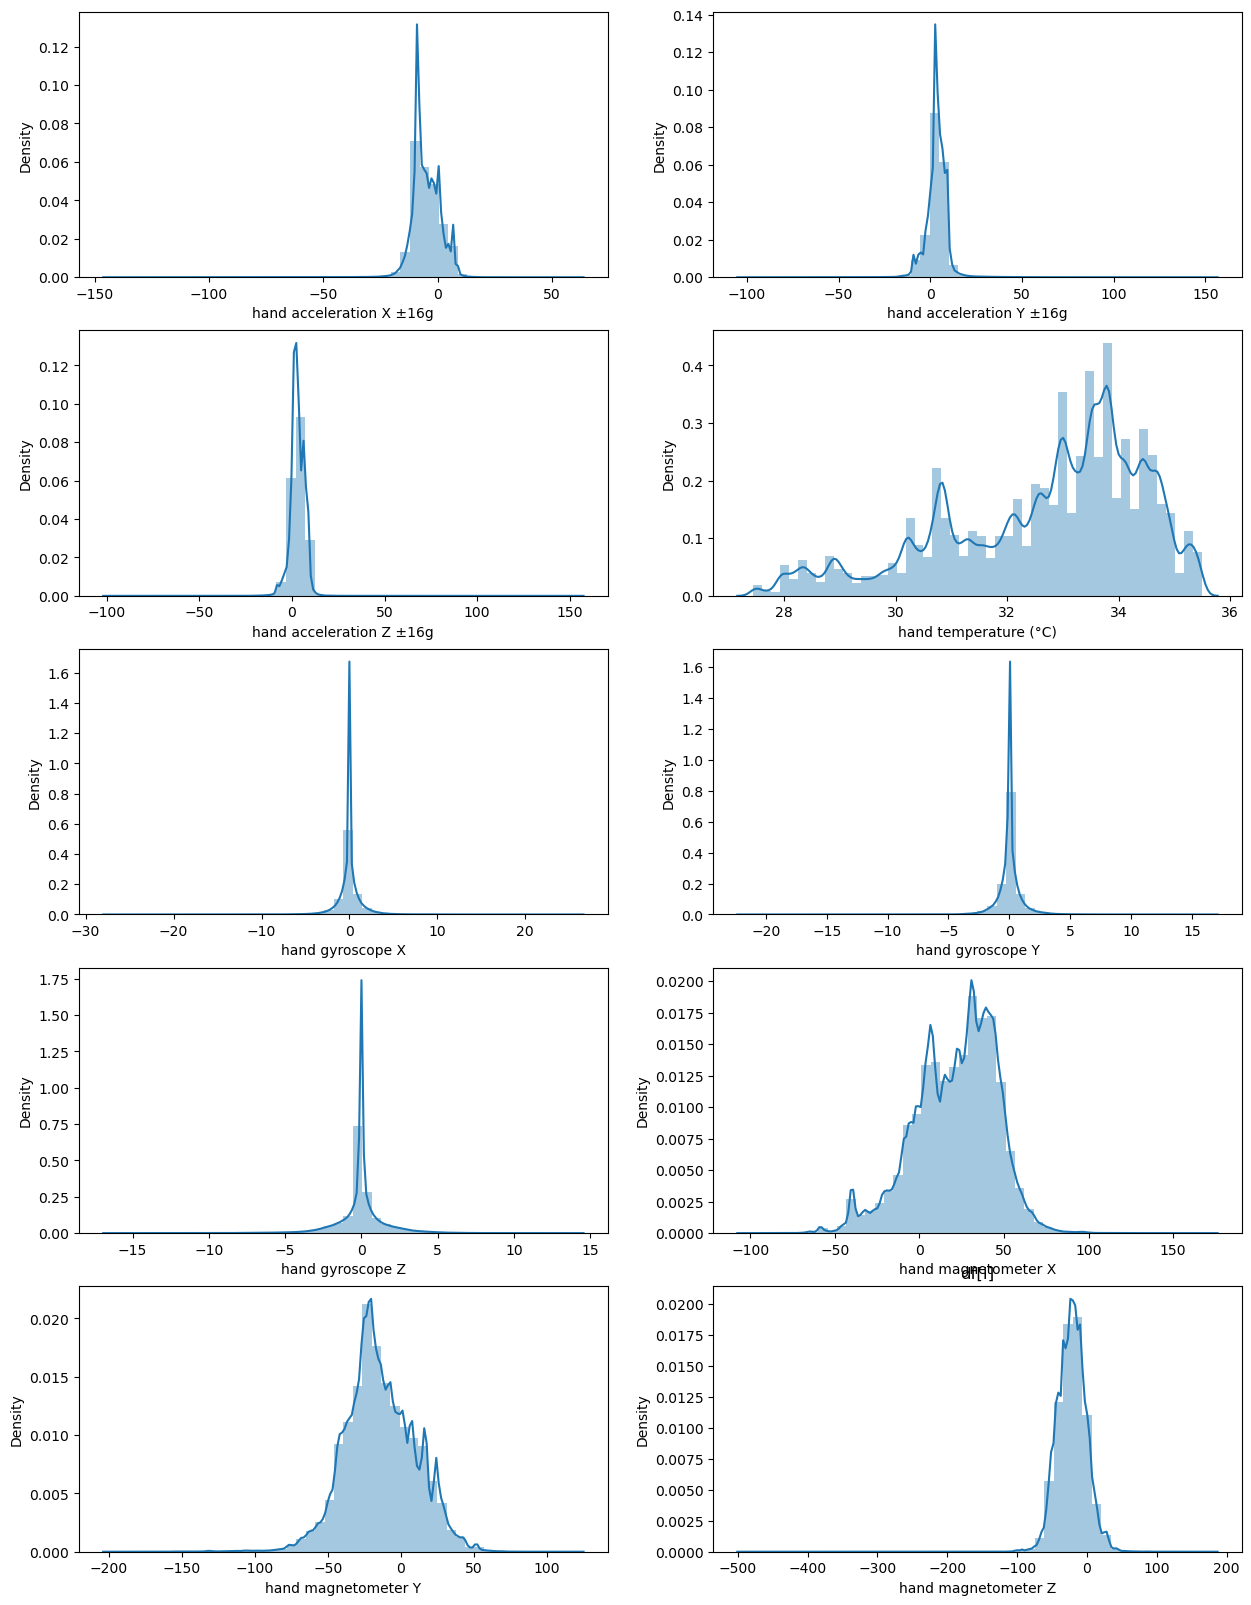

In [17]:
fig,ax = plt.subplots(5,2,figsize = (15,20))
for i,subplot in zip(hand,ax.flatten()):
    sns.distplot(df[i],ax = subplot,kde = True)
    plt.title('df[i]')
    
plt.show()

Comparing from the distribution graphs here 

The gyroscope x,y and z measures of hand seems to have very poor distribution of data. That is most of the datapoints lie within the a small range (from the output of the describe function we can say that the range is approximately between -0.3 to 0.3)

Even though the skew value of hand gyroscope x is close to 0 (0.086) i.e even though it is close to normal and seems to be not that skewed still the data is very poorly dispersed. 

So just from this analysis we can speculate that hand gyroscope x,y and z may not contribute much to the prediction of the type of activity in this data 

The hand acceleration x,y and z measures have better dispersion than the gyroscope measures of hand but still the distribution is not great as each are still heavily skewed either positively and negatively (-0.2851467536268684,2.11550879932569,-0.5255447638935343 respectively with x and z being negatively or left skewed and y being positively or right skewed) still we can speculate hand acceleration measures might play a slightly better role in affecting the classification of the activities than the gyroscope measures but still since the distribution is not that great their effect may still be weak(these all are just speculations and observations from the graph we might never know the effect until we build various models)

The hand magnetometer x,y and z measures have the best distribution of data with data being dispersed within a larger range than the gyroscope and acceleration measures still the z measure is heavily skewed towards the negative side with a possible outliers in the left side of the peak

The hand magnetometer x and y is well dispersed and distributed out of all the hand measurements as seen in the subplots above. Still they are somewhat skewed and there are potential outliers in this data as well but they might have a significant effect on the activityID

The hand temperature variable will definitely play a huge role in determining the type of activity since it is very well distribution with very less possible potential outliers and skewness. Still it is negatively skewed. It also seems to have a multi modal distribution which means it might do a significantly better job in helping us in explaining the different activity types

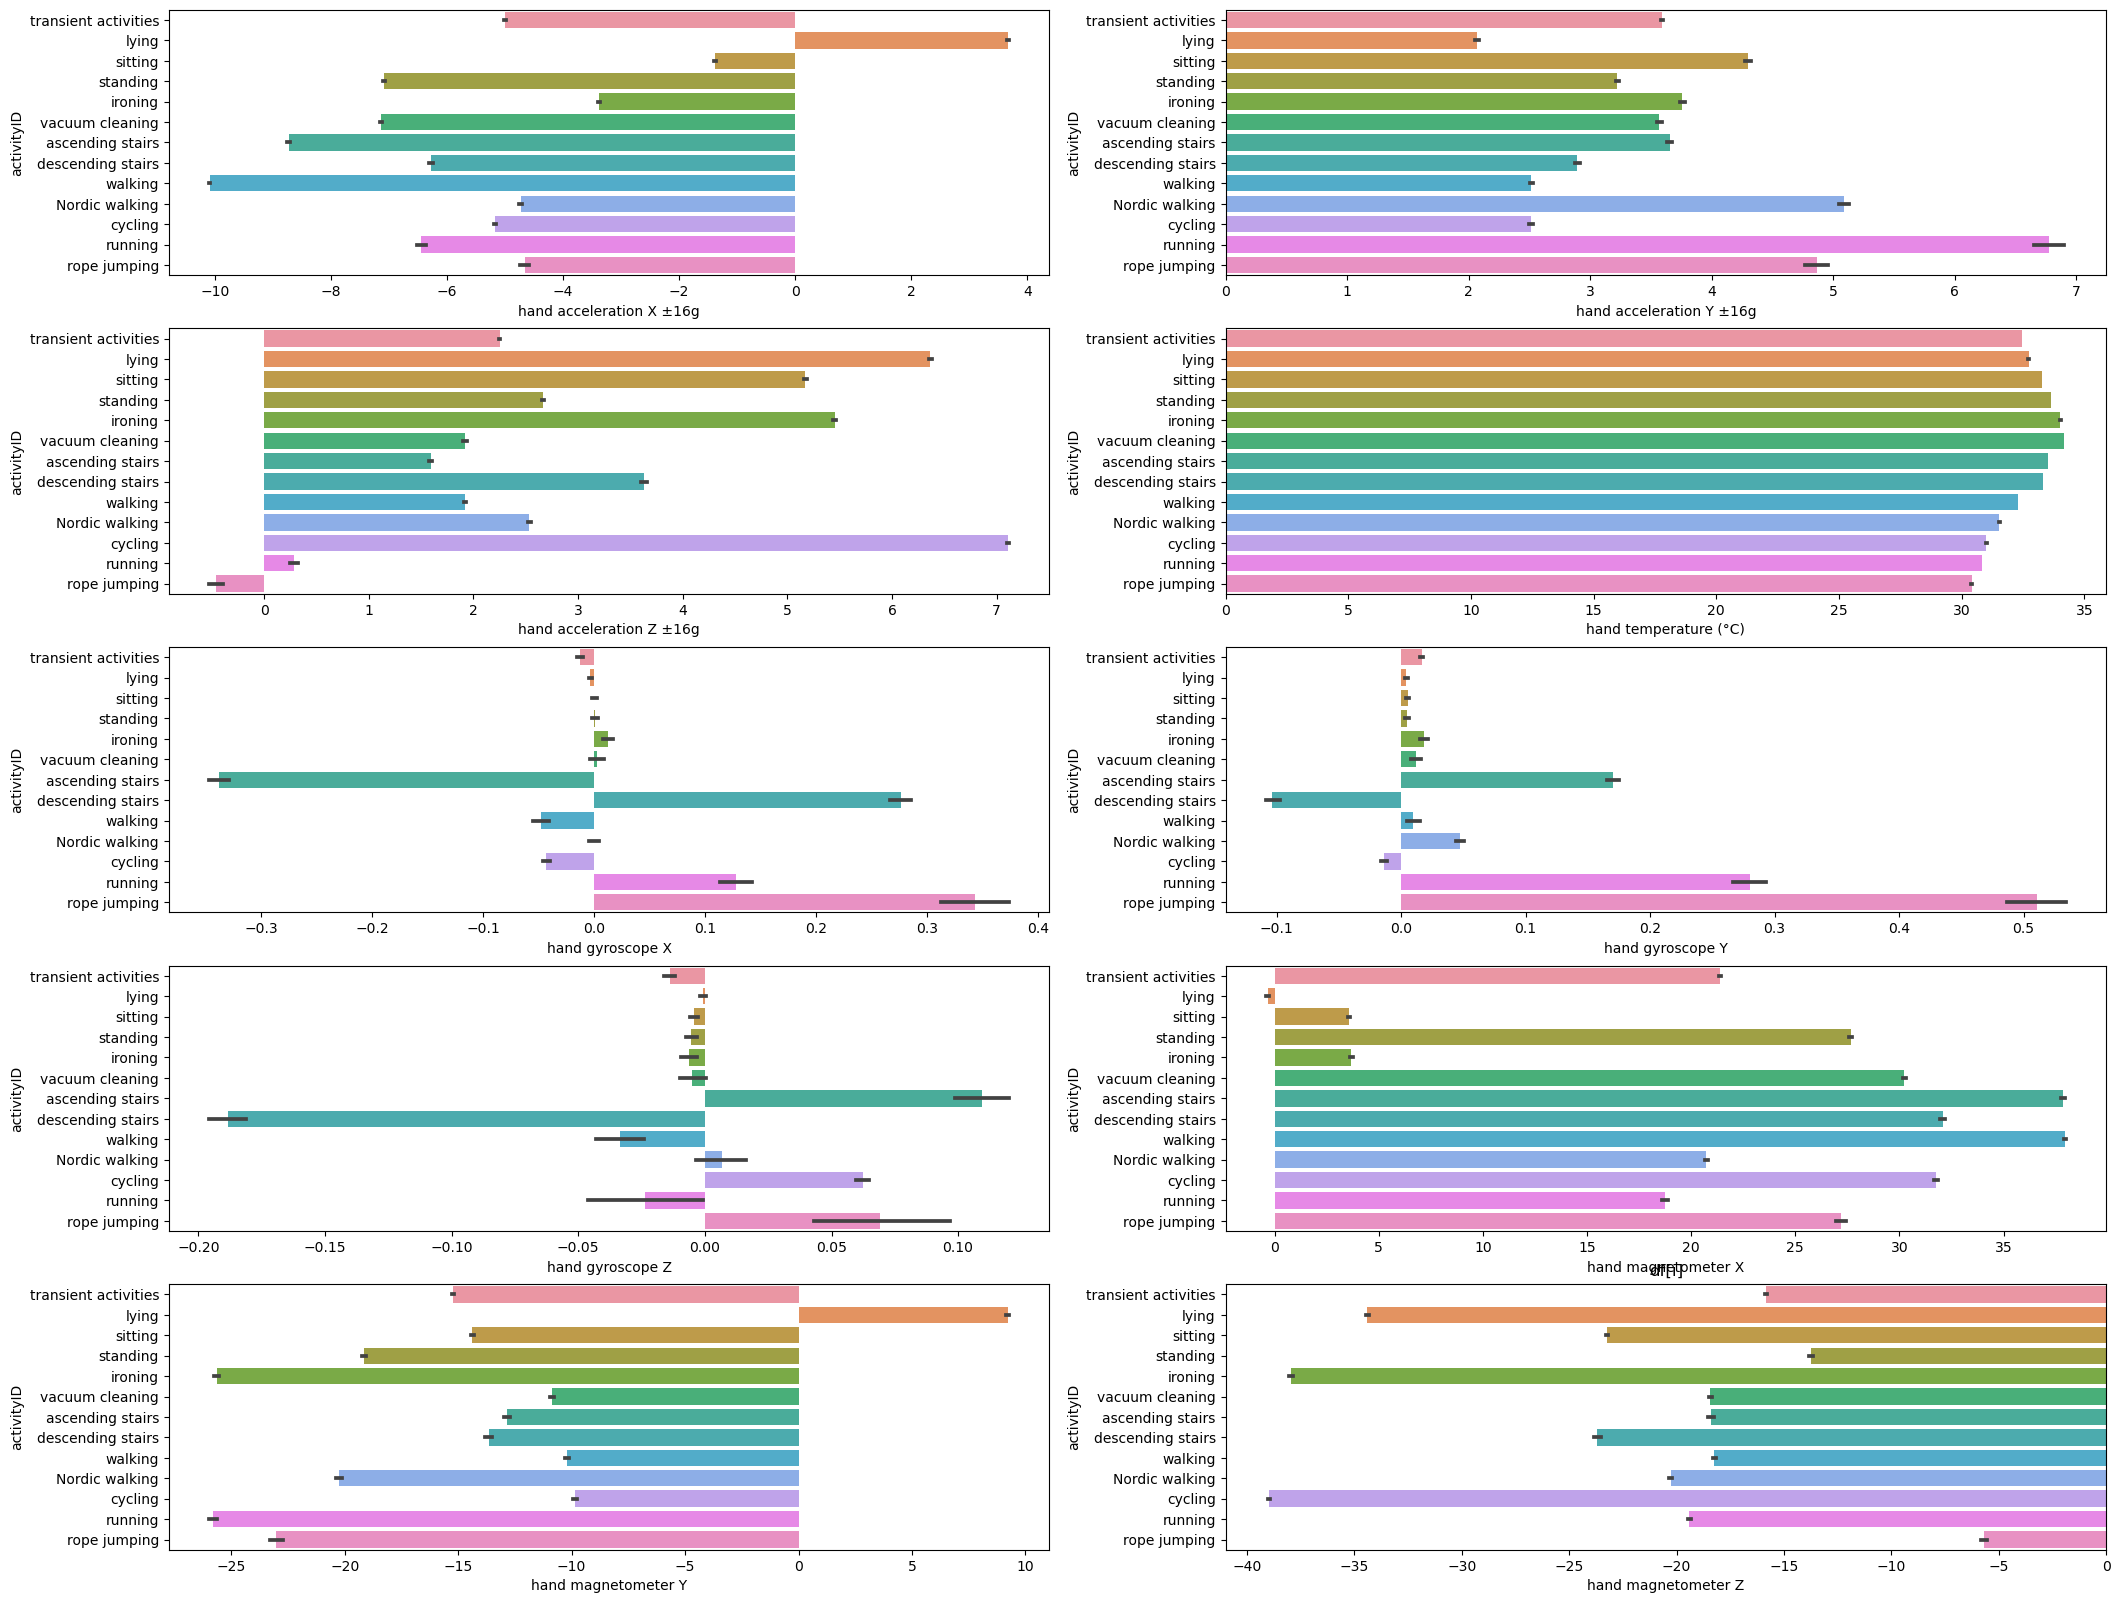

In [18]:
fig,ax = plt.subplots(5,2,figsize = (25,20))
for i,subplot in zip(hand,ax.flatten()):
    sns.barplot(x = df[i],y = df['activityID'],ax = subplot)
    plt.title('df[i]')
    
plt.show()

The above graphs clearly tells us the nature of the measurements for each activity helping us in understanding the patterns here are some of the observations (these observations are just from what we infer from the graph we do need domain experts to say whether the measurements are low, high or normal these are just insights to understand some sort of pattern n the data)

The hand acceleration x for most of the activites are in the negative side out of which walking has the highest negative value for acceleration x measure on an average. The hand acceleration measure of y and z for most activites are on the positive front with both the measures being high for running on an average

The hand temperature of all the activities are on an average above 30 degree celcius out of which vaccum cleaning and ironing seems to have the highest high temperature

The hand gyroscope measures have values that are on the positive and the negative side for various activites with rope jumping having highest positive values for hand gyroscope x and y and ascending stairs having the highest negative value for gyroscope x and descending stairs having highest negative value for gyroscope y where in gyroscope z the descending stairs have the highest negative value and ascending stairs have the highest positive value followed by rope jumping

The hand magnetometer y and z has values in the negative side for almost all activities and hand magnetometer x values are in the positive side for all the activites. The hand magnetometer x has the higest positive values for ascending stairs and walking where the hand magnetometer has the highest negative value for running and ironing and for hand magnetometer z the highest values are for cycling and ironing

From these observations and looking at the graph we can understand the nature of the activities,the measurements affect them and the underlying patterns in the data


##### Chest measurements

In [19]:
chest = df[['chest acceleration X ±16g','chest acceleration Y ±16g','chest acceleration Z ±16g', 
    'chest temperature (°C)',
    'chest gyroscope X', 'chest gyroscope Y','chest gyroscope Z',
    'chest magnetometer X','chest magnetometer Y','chest magnetometer Z']].columns.to_list()

In [20]:
for i in chest:
    print(i,df[i].skew())

chest acceleration X ±16g 0.2192487451249327
chest acceleration Y ±16g 1.4064862386502737
chest acceleration Z ±16g 0.30833815999675357
chest temperature (°C) -0.6826560334142966
chest gyroscope X 3.156976335402222
chest gyroscope Y -0.01817051070364892
chest gyroscope Z -0.07055368863703133
chest magnetometer X 0.21264466136626686
chest magnetometer Y 0.6638985716951734
chest magnetometer Z 0.09723012821007807


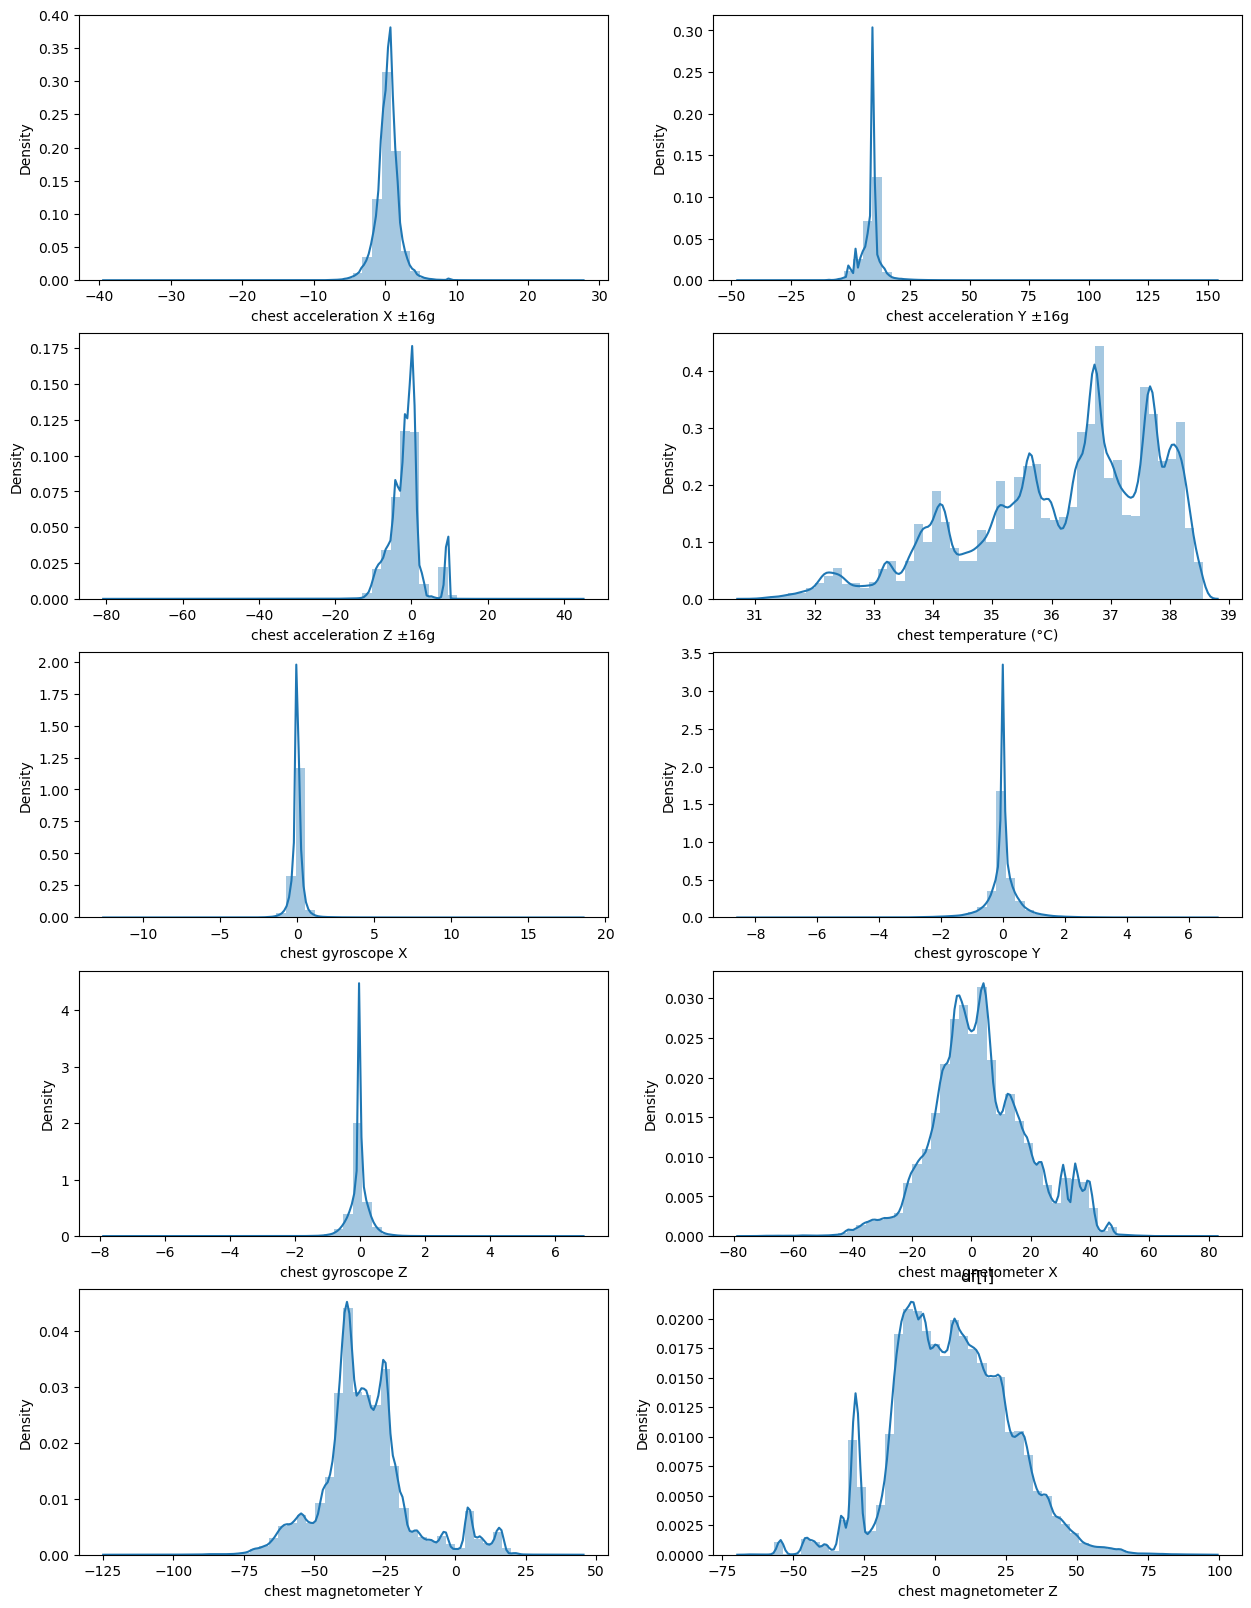

In [21]:
fig,ax = plt.subplots(5,2,figsize = (15,20))
for i,subplot in zip(chest,ax.flatten()):
    sns.distplot(df[i],ax = subplot,kde = True)
    plt.title('df[i]')
    
plt.show()

So comparing from the earlier inferences we drew from the hand measurements the distribution the chest measurements also almost seem to follow the same pattern. Following are some of the observations

The chest gyroscope x,y and z have poorest distribution of data with most of the datapoints lying within a very close range of values

The chest acceleration x,y and z have better distribution than the gyroscope measures but still the distribution is not that great and are heavily skewed with high volume of potential outliers

The chest magnetometer measures x,y and z have the best distributed data out of the three measurements still not the best but significanly better than the other two measuremets.Comparing to the hand the chest magnetometer z also has good distribution whereas in hand magnetometer that was not the case

Here again chest temperature has multi modal distribution which might also help us in explaining the activity


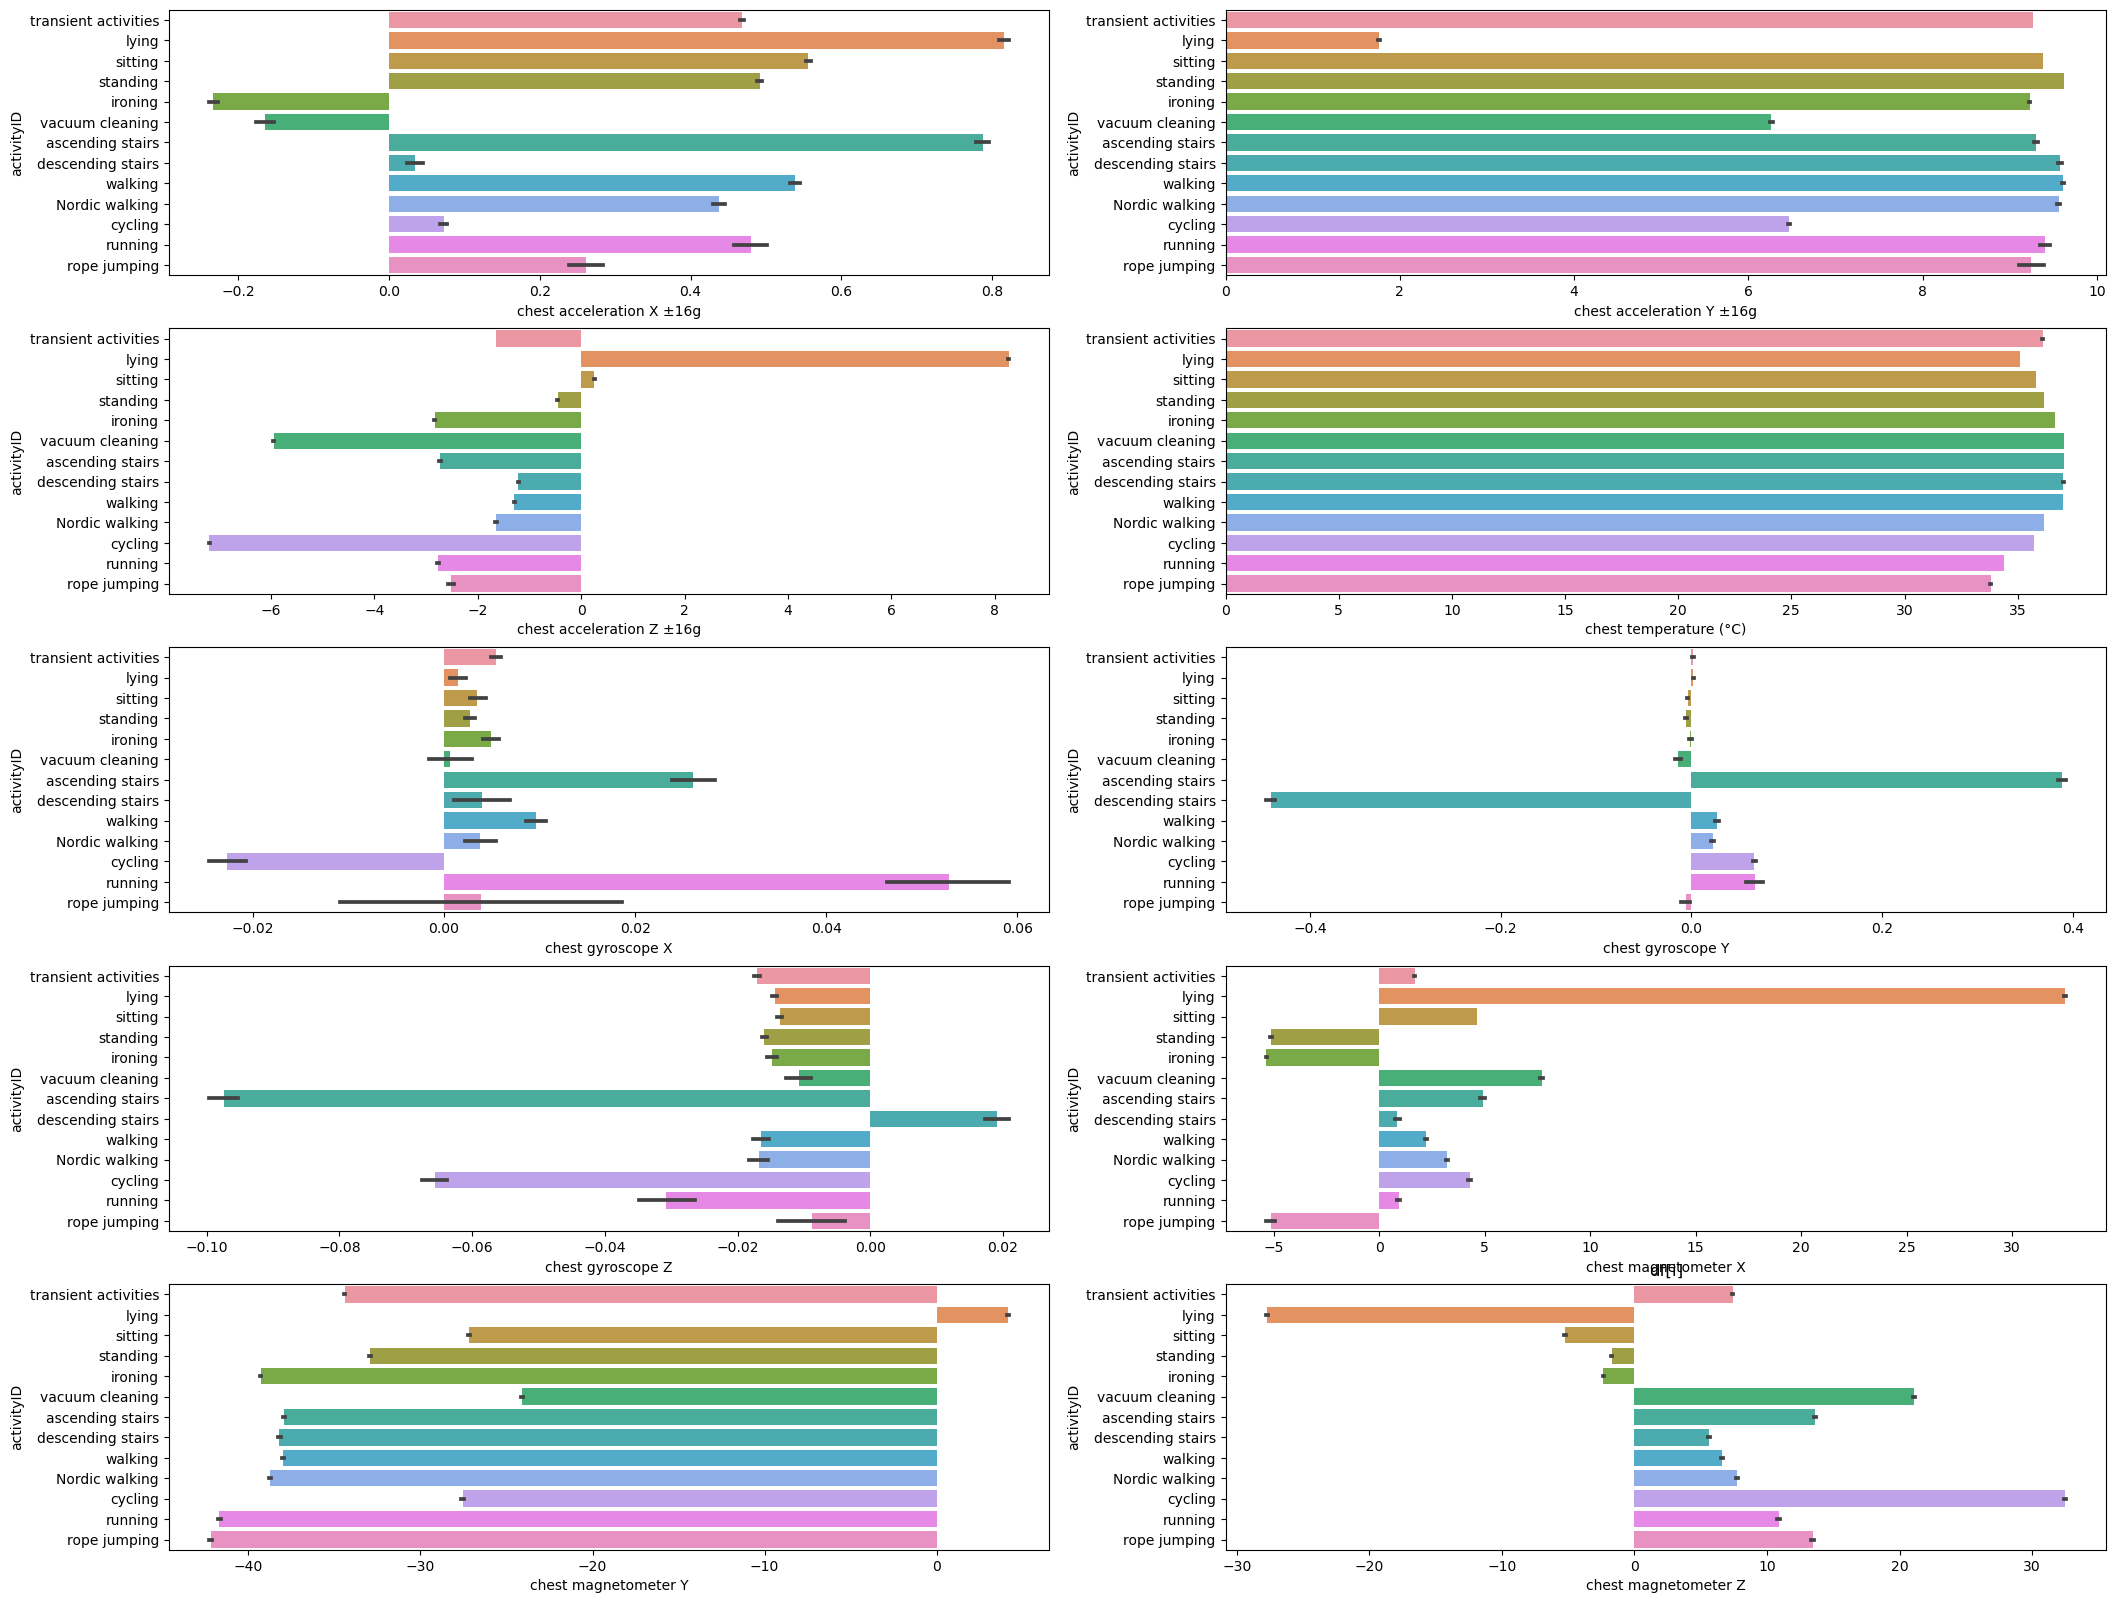

In [22]:
fig,ax = plt.subplots(5,2,figsize = (25,20))
for i,subplot in zip(chest,ax.flatten()):
    sns.barplot(x = df[i],y = df['activityID'],ax = subplot)
    plt.title('df[i]')
    
plt.show()

Some of the observations from the above graphs are

Chest acceleration x and z has the higest positive value for lying and chest acceleration y has the highest value for descending stairs and walking. Chest acceleration z has the highest negative value for cycling and x has highest negative value for ironing

Just like hand temperature chest temperature for all the activites are above 30 with vaccum cleaning, ascending and descending stairs activities having the highest temperature

Chest gyroscope x has the highest positive value for running and highest negative value for cycling. Chest gyroscope y has highest positive value for ascending stairs and highest negative value for descending stairs and vice versa for chest gyroscope z

Chest magnetometer x and y has highest positive value for lying and y highest negative value for rope jumping whereas chest magnetometer z has the highest negative value for lying and highest positive value for cycling

##### ankle measurements

In [23]:
ankle = df[['ankle acceleration X ±16g','ankle acceleration Y ±16g','ankle acceleration Z ±16g', 
    'ankle temperature (°C)',
    'ankle gyroscope X', 'ankle gyroscope Y','ankle gyroscope Z',
    'ankle magnetometer X','ankle magnetometer Y','ankle magnetometer Z']].columns.to_list()

In [24]:
for i in ankle:
    print(i,df[i].skew())

ankle acceleration X ±16g 2.9731911673151075
ankle acceleration Y ±16g 0.2871247998338792
ankle acceleration Z ±16g -1.297224573197239
ankle temperature (°C) -0.9804753293319258
ankle gyroscope X 0.19862812524816784
ankle gyroscope Y -1.0508072864378173
ankle gyroscope Z 0.881657573323499
ankle magnetometer X -0.4907021966690196
ankle magnetometer Y -0.34309281770144395
ankle magnetometer Z -0.350571024796118


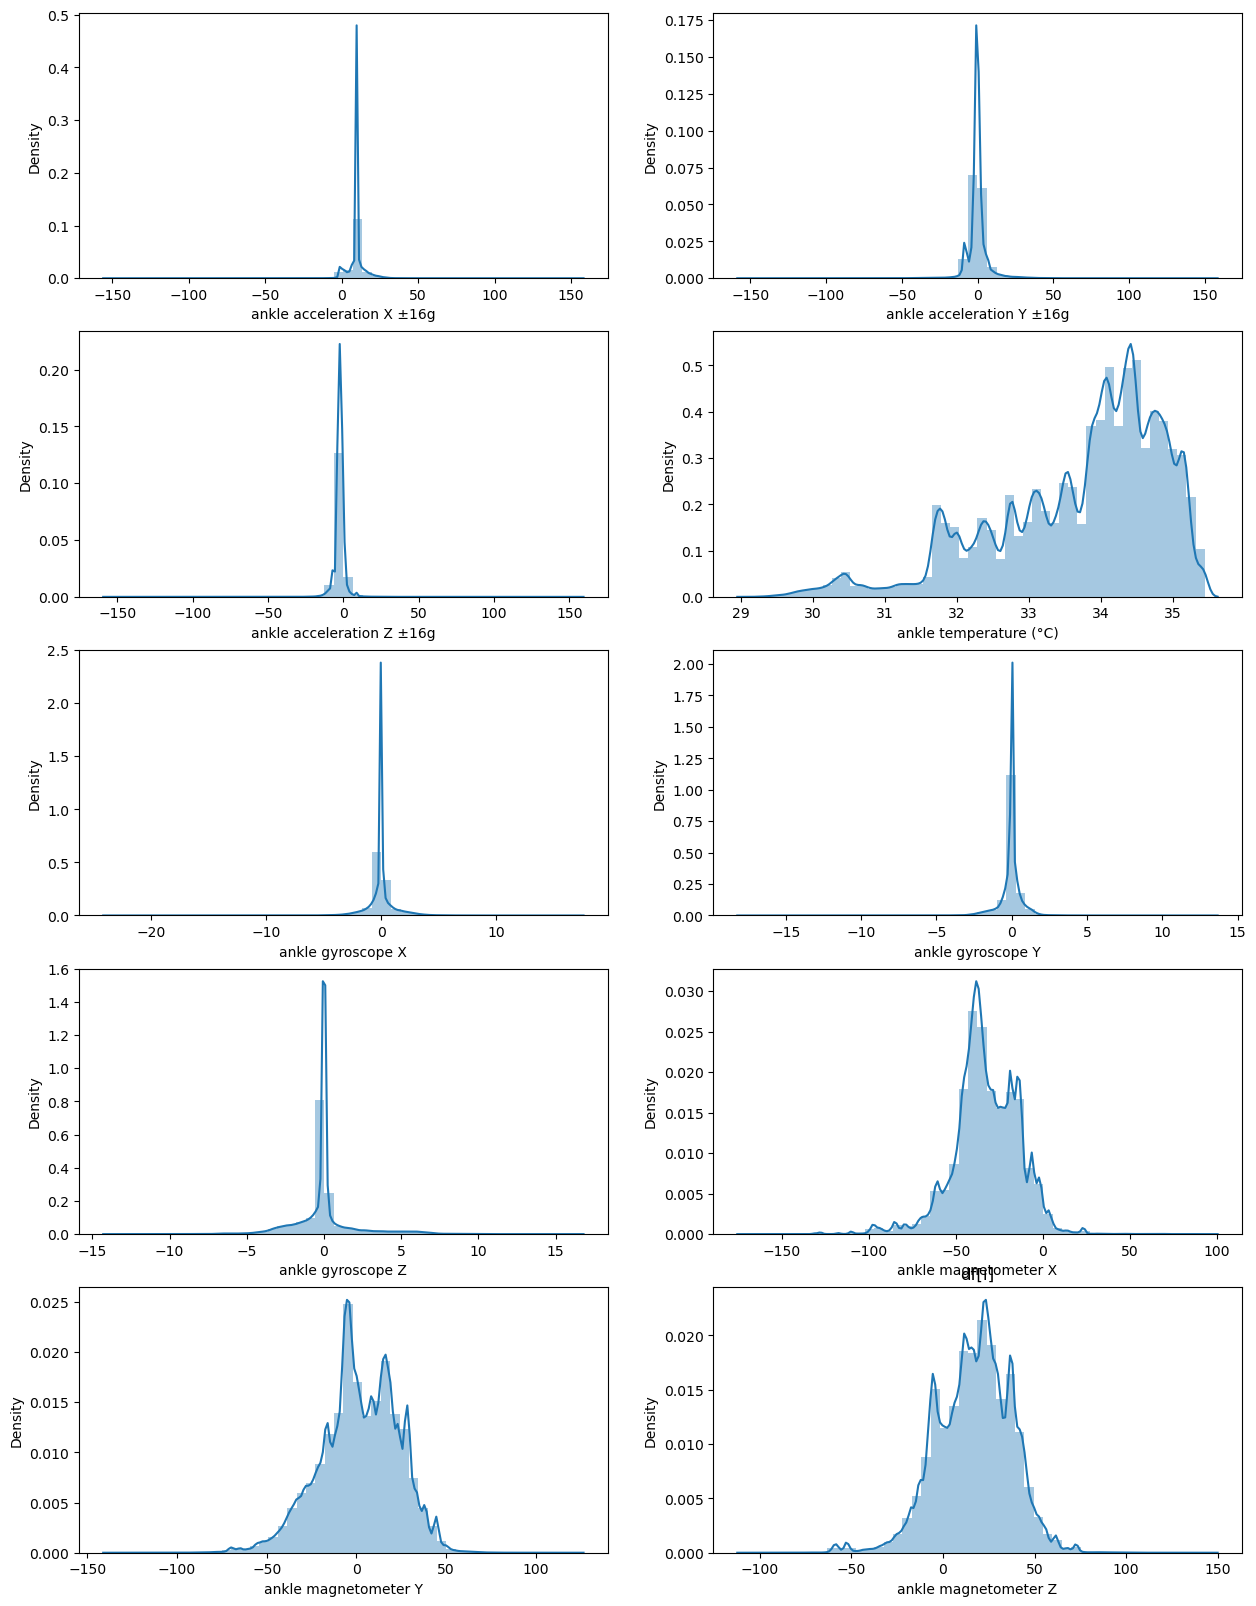

In [25]:
fig,ax = plt.subplots(5,2,figsize = (15,20))
for i,subplot in zip(ankle,ax.flatten()):
    sns.distplot(df[i],ax = subplot,kde = True)
    plt.title('df[i]')
    
plt.show()

Compared to the hand and chest measurements the ankle measurements has a slight difference in their distributions

In hand and chest the gyroscope measurements had very poor distribution but here along with the ankle gyroscope x,y and z measurements the acceleration measurements do have very poor distribution and dispersion of data with most of the datapoints within a very small range of values

Here also the ankle measurement do follow multimodal distributions 

Here also the magnetometer measurements are the ones that has the best distributions with the data well spread compared to the other two measurements though they are still skewed and has potential outliers

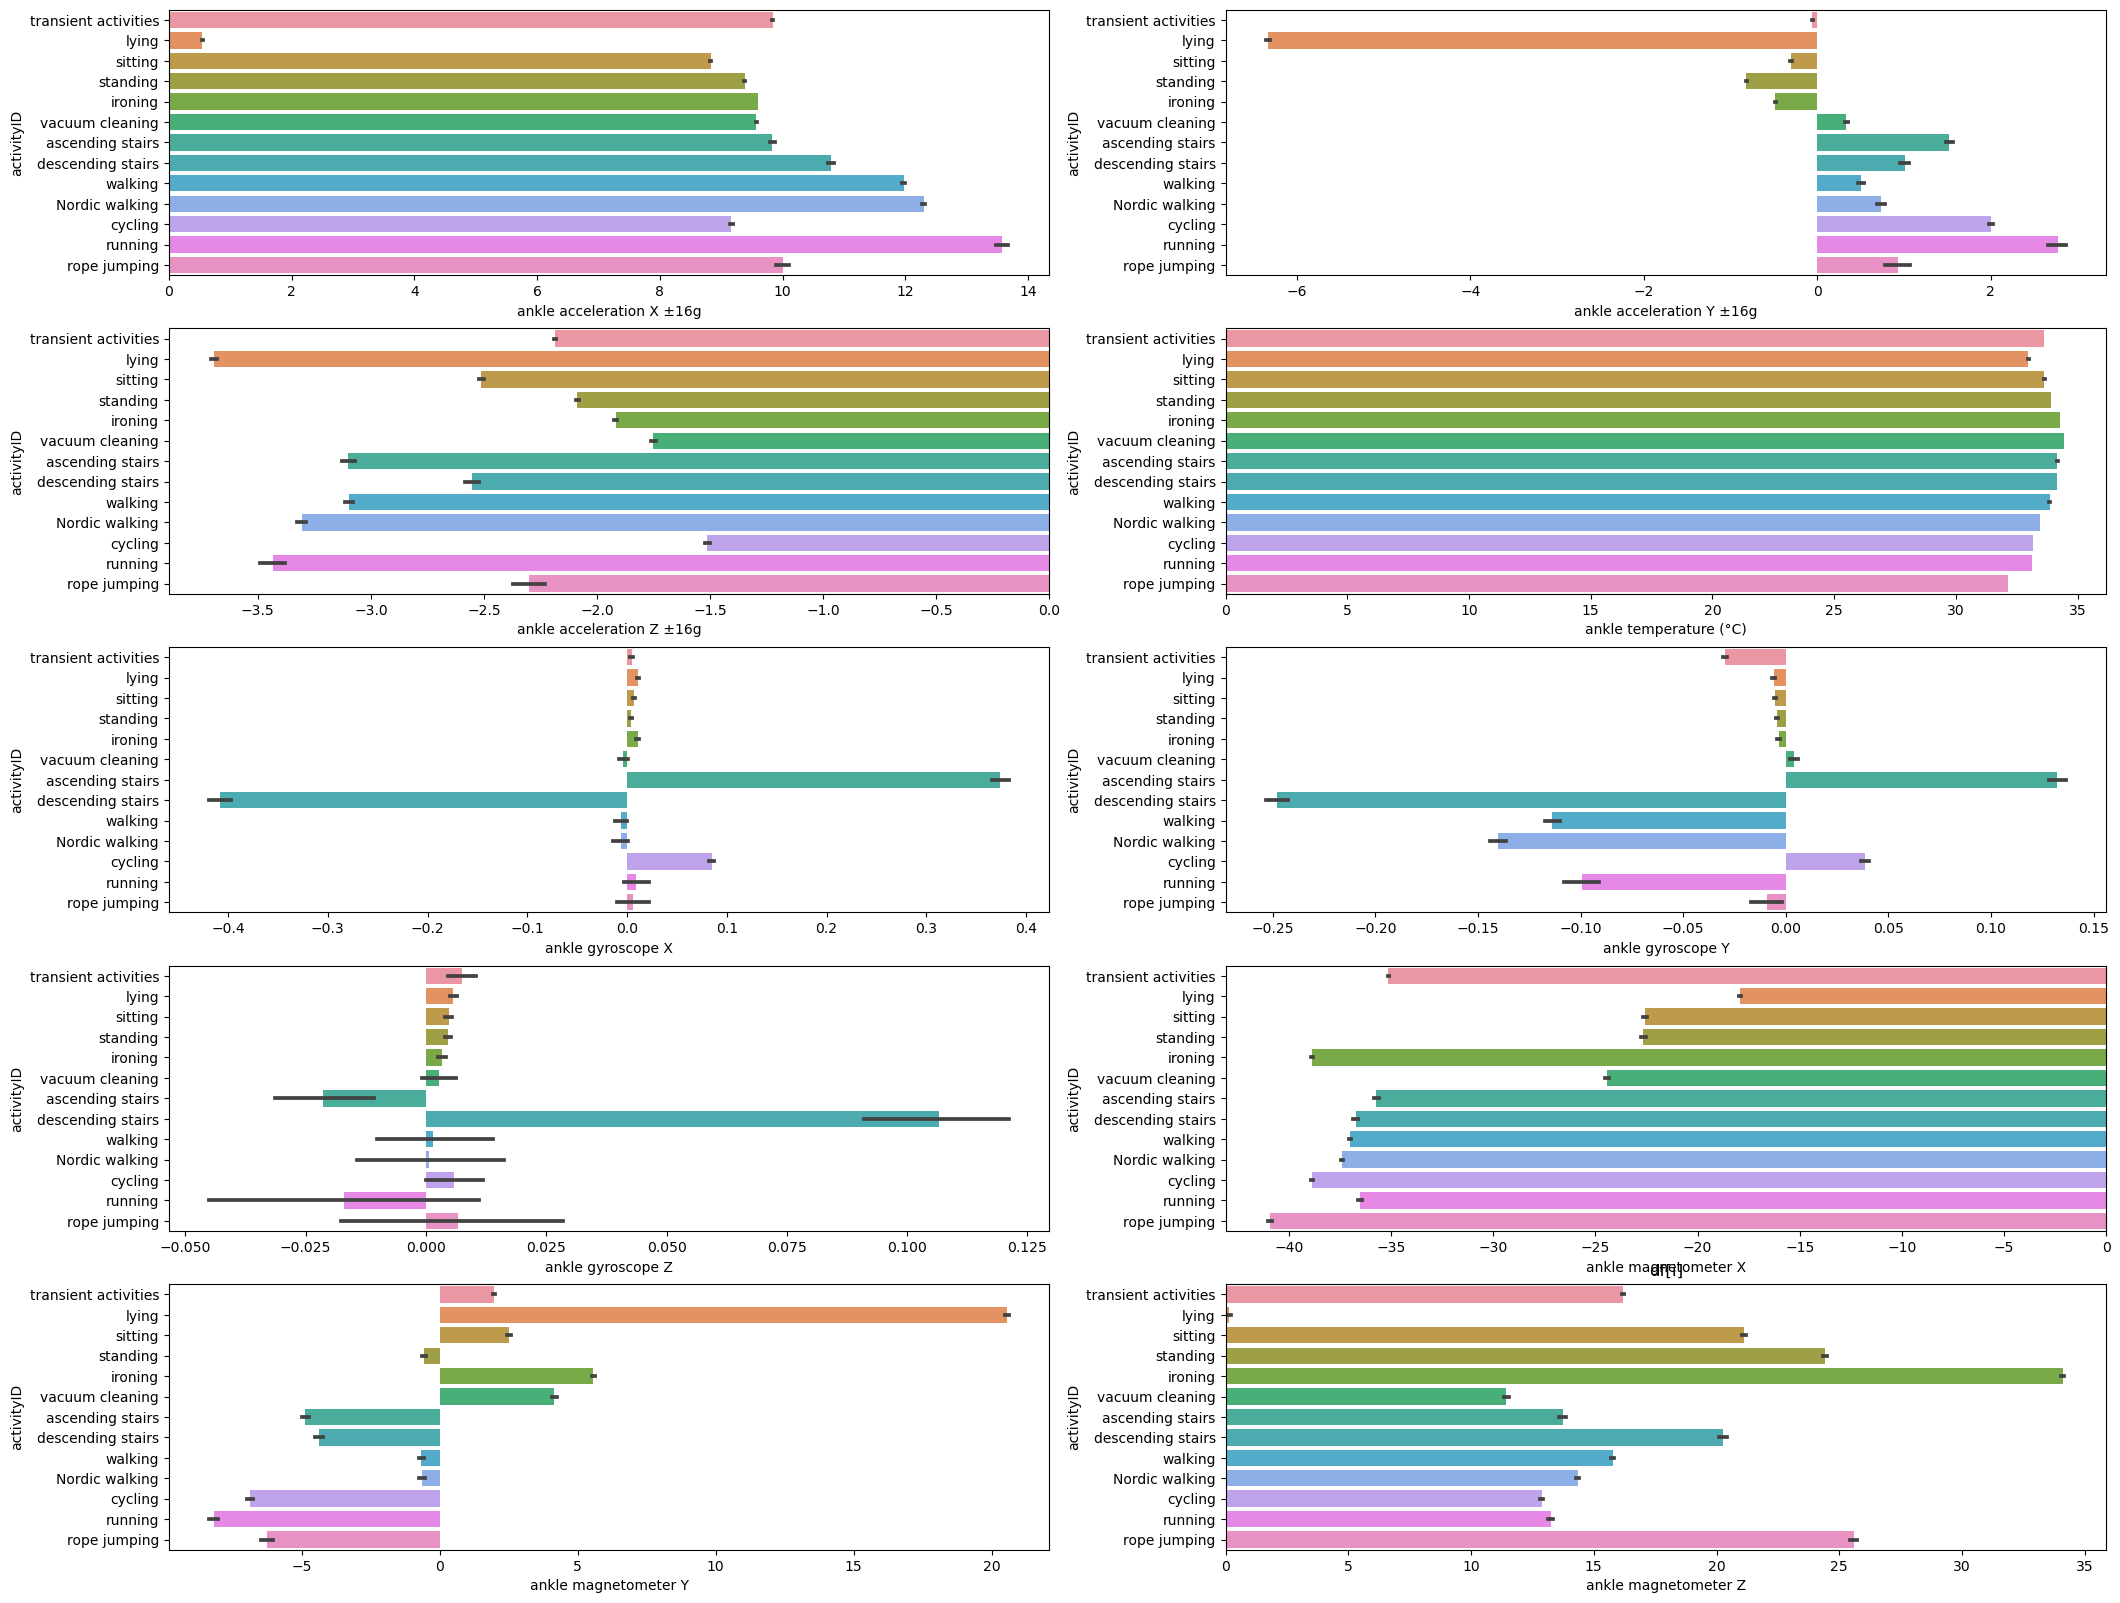

In [26]:
fig,ax = plt.subplots(5,2,figsize = (25,20))
for i,subplot in zip(ankle,ax.flatten()):
    sns.barplot(x = df[i],y = df['activityID'],ax = subplot)
    plt.title('df[i]')
    
plt.show()

From the above graphs these are some of the observations 

Ankle acceleration x and y has the highest positive value for running and acceleration y and z has the highest negative value for lying followed by running for z and also lying has the lowest positive value in ankle acceleration x 

Ankle gyroscope x and y has the higest positive value for ascending stairs and highest negative value for descending stairs and the vice versa for the ankle gyroscope z

Same as chest and hand ankle temperature here too is above 30 for most of the activities with vaccum cleaning and transient activities having the highest ankle temperatures

Ankle magnetometer x has the higest negative value for rope jumping and ankle magnetometer has the highest negative value for running. Ankle magnetometer y has the highest positive value for lying and z has highest positive value for ironing

### The above plots are just to get the basic idea of what the variables look like and how they explain the classification of the activities. We need to go for further explorations and see how mutiple independent variables affect the target variable
### From the above inferences we can speculate to some extent that gyroscope measurements have very poor data spread so they the hand,ankle and chest gyroscope measurements may not be that useful in predicting the classes of activities. Again we can't conclude further exploration and statistical testing 
### Also the temperature measurement does seem to add significant effect in explaining the target variable and the spread of the data is also good so we can speculate that the hand, ankle and chest measurements will be highly useful in predicting the target classes
### From the bivariate analysis against the target variable we can understand how each measurement help in understanding the class of activity and the what each measurement really computes that might further help us in understanding why the measurements are in such nature for specific activities

## Feature engineering,univariate and bivariate on heart rate 

<AxesSubplot:xlabel='heart_rate', ylabel='Density'>

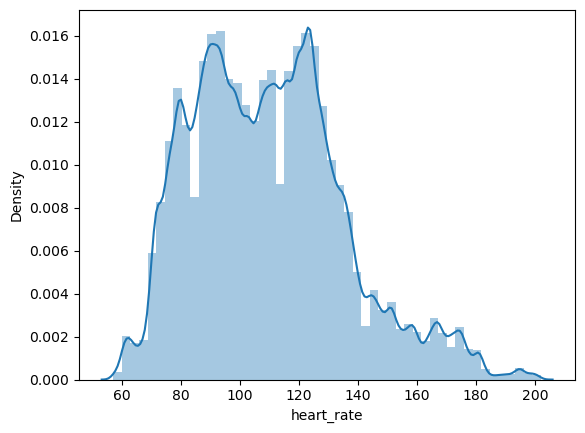

In [81]:
sns.distplot(df['heart_rate'])

In [82]:
df['heart_rate'].skew()

0.5926793038578191

<AxesSubplot:xlabel='heart_rate', ylabel='activityID'>

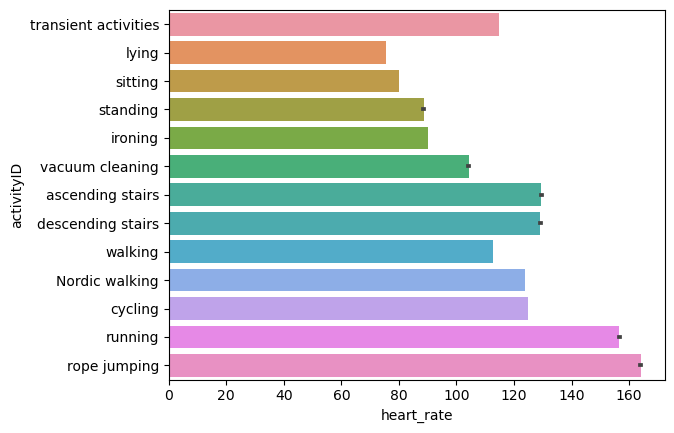

In [84]:
sns.barplot(df['heart_rate'],df['activityID'])

In [14]:
df.groupby('activityID')['heart_rate'].mean()

activityID
Nordic walking          123.816163
ascending stairs        129.494822
cycling                 124.868104
descending stairs       129.137111
ironing                  90.043923
lying                    75.520405
rope jumping            163.964137
running                 156.572796
sitting                  79.995329
standing                 88.532825
transient activities    114.795215
vacuum cleaning         104.175617
walking                 112.771608
Name: heart_rate, dtype: float64

In [11]:
df['heart_rate']=df['heart_rate'].astype('int')

In [18]:
bins=[50,100,130,170,220]
labels=['low','moderate','high','intense']
df['heart_rate_fe'] = pd.cut(df['heart_rate'],bins=bins,labels=labels)

<AxesSubplot:xlabel='activityID'>

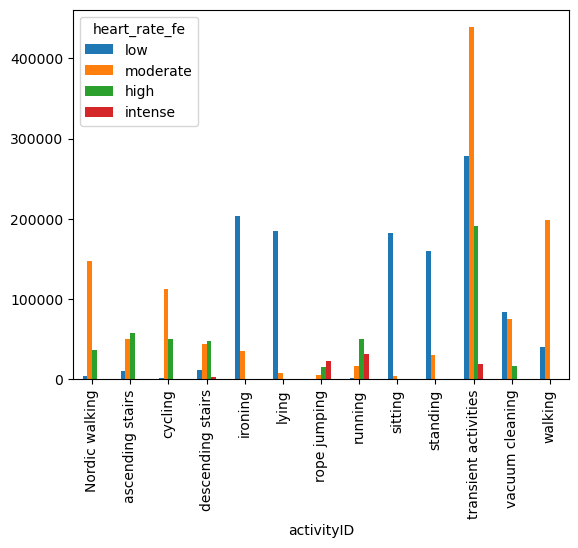

In [21]:
pd.crosstab(df['activityID'],df['heart_rate_fe']).plot(kind = 'bar')

From the above graphs and feature engineering we can see that for activites that are intense such as rope jumping and running the heart rate is high and it is on the lower side for activites that are less intense such as nordic walking, cylcing,sitting and ironing. Though cycling and nordic walking are more intense than sitting ironing and vaccum cleaning we can see that their heart rates are lower than of rope jumping and running indicating a somewhat of clear pattern that as the intensity of the activities increase heart rate also increases

### Model Building

#### Building a base model using the Decision Tree algorithm before balancing the target variable classes  with just two parameters mentioned explicitly to give us an idea of what further improvements we can make to create the best model to make the predictions

#### Build all the models below using a arbitrary max depth of 10 since using the decision Tree with no paramters gave us an overfit model(refer to physical_activity_analysis_final)

In [37]:
x = df.drop(['activityID','PeopleId','heart_rate_fe'],axis = 1)
y = df['activityID']

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.70,random_state = 100)

In [39]:
dc = DecisionTreeClassifier(max_depth = 10,random_state = 10)
model_base = dc.fit(xtrain,ytrain)
ypred = model_base.predict(xtest)

In [40]:
print(classification_report(ytest,ypred))

                      precision    recall  f1-score   support

      Nordic walking       0.85      0.73      0.79     56408
    ascending stairs       0.51      0.28      0.37     35036
             cycling       0.90      0.81      0.86     49217
   descending stairs       0.41      0.35      0.38     31488
             ironing       0.84      0.88      0.86     71779
               lying       1.00      0.95      0.97     57923
        rope jumping       0.85      0.51      0.64     12906
             running       0.83      0.69      0.75     29352
             sitting       0.98      0.90      0.94     55385
            standing       0.87      0.83      0.85     56999
transient activities       0.69      0.87      0.77    278522
     vacuum cleaning       0.88      0.59      0.71     52657
             walking       0.77      0.73      0.75     71545

            accuracy                           0.78    859217
           macro avg       0.80      0.70      0.74    859217
      

#### Now downsampling the majority class since all the other classes are fairly balanced. Using this training dataset(downsampling is done only on the training dataset to avoid data leak) we are going to use the same Decision Tree algorithm we used in the base model

In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = {'transient activities':193788},random_state = 100)
rus.fit(xtrain,ytrain)
xtrain_over,ytrain_over = rus.fit_resample(xtrain,ytrain)

<AxesSubplot:>

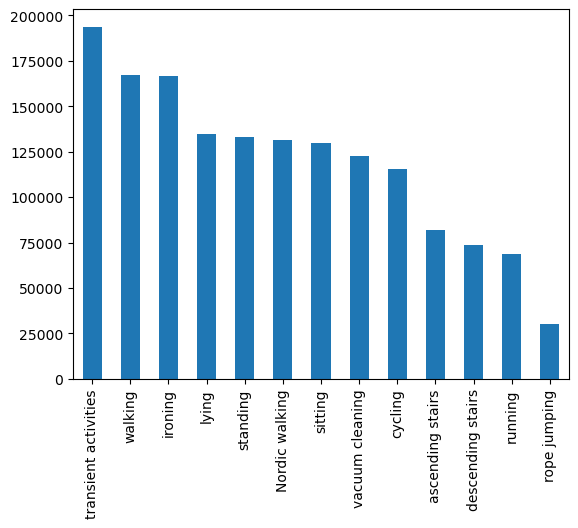

In [42]:
ytrain_over.value_counts().plot(kind = 'bar')

#### The dataset seems somewhat balanced now that we have performed downsampling of the majority class of the target variable
#### Let us now build a model to see the effect of the downsampling

In [43]:
dc = DecisionTreeClassifier(max_depth = 10,random_state = 10)
model_base = dc.fit(xtrain_over,ytrain_over)
ypred_over = model_base.predict(xtest)

In [78]:
print(classification_report(ytest,ypred_over,digits=7))

                      precision    recall  f1-score   support

      Nordic walking  0.6927780 0.9200113 0.7903867     56408
    ascending stairs  0.4791144 0.4249344 0.4504008     35036
             cycling  0.9008802 0.8276815 0.8627310     49217
   descending stairs  0.3759968 0.5001588 0.4292801     31488
             ironing  0.8792111 0.8813302 0.8802694     71779
               lying  0.9829812 0.9502961 0.9663624     57923
        rope jumping  0.8165443 0.7411282 0.7770106     12906
             running  0.8019477 0.6733442 0.7320407     29352
             sitting  0.9143160 0.9498420 0.9317405     55385
            standing  0.8369190 0.9070159 0.8705587     56999
transient activities  0.8114993 0.5417095 0.6497103    278522
     vacuum cleaning  0.4808191 0.8659437 0.6183157     52657
             walking  0.6406262 0.9111049 0.7522923     71545

            accuracy                      0.7412214    859217
           macro avg  0.7395103 0.7765001 0.7470076    859217
      

#### The performances of the top two models are not bad but not great either. We still need to try various other methods and algorithms to see which model might give us the best results. But these two models do give us an idea of the dataset and the classes prediction.
#### From the above two models we can see that the ascending and descending stairs have the worst prediction so we might want to take a look at the records belonging to their classes to see what is affecting this prediction and see how these classes fare in other algorithms

In [46]:
from sklearn.preprocessing import PowerTransformer

In [47]:
xtrain_num= xtrain_over[['heart_rate',
 'hand temperature (°C)',
 'hand acceleration X ±16g',
 'hand acceleration Y ±16g',
 'hand acceleration Z ±16g',
 'hand gyroscope X',
 'hand gyroscope Y',
 'hand gyroscope Z',
 'hand magnetometer X',
 'hand magnetometer Y',
 'hand magnetometer Z',
 'chest temperature (°C)',
 'chest acceleration X ±16g',
 'chest acceleration Y ±16g',
 'chest acceleration Z ±16g',
 'chest gyroscope X',
 'chest gyroscope Y',
 'chest gyroscope Z',
 'chest magnetometer X',
 'chest magnetometer Y',
 'chest magnetometer Z',
 'ankle temperature (°C)',
 'ankle acceleration X ±16g',
 'ankle acceleration Y ±16g',
 'ankle acceleration Z ±16g',
 'ankle gyroscope X',
 'ankle gyroscope Y',
 'ankle gyroscope Z',
 'ankle magnetometer X',
 'ankle magnetometer Y',
 'ankle magnetometer Z']]

xtest_num= xtest[['heart_rate',
 'hand temperature (°C)',
 'hand acceleration X ±16g',
 'hand acceleration Y ±16g',
 'hand acceleration Z ±16g',
 'hand gyroscope X',
 'hand gyroscope Y',
 'hand gyroscope Z',
 'hand magnetometer X',
 'hand magnetometer Y',
 'hand magnetometer Z',
 'chest temperature (°C)',
 'chest acceleration X ±16g',
 'chest acceleration Y ±16g',
 'chest acceleration Z ±16g',
 'chest gyroscope X',
 'chest gyroscope Y',
 'chest gyroscope Z',
 'chest magnetometer X',
 'chest magnetometer Y',
 'chest magnetometer Z',
 'ankle temperature (°C)',
 'ankle acceleration X ±16g',
 'ankle acceleration Y ±16g',
 'ankle acceleration Z ±16g',
 'ankle gyroscope X',
 'ankle gyroscope Y',
 'ankle gyroscope Z',
 'ankle magnetometer X',
 'ankle magnetometer Y',
 'ankle magnetometer Z']]

In [48]:
pt=PowerTransformer()
xtrain_num=pd.DataFrame(pt.fit_transform(xtrain_num),columns=xtrain_num.columns)
xtest_num=pd.DataFrame(pt.transform(xtest_num),columns=xtest_num.columns)

In [49]:
xtrain_num.index=np.arange(0,1549574)

In [50]:
xtest_num.index=np.arange(0,859217)

In [51]:
dc = DecisionTreeClassifier(max_depth = 10,random_state = 10)
model_base = dc.fit(xtrain_num,ytrain_over)
ypred_transform = model_base.predict(xtest_num)

In [77]:
print(classification_report(ytest,ypred_transform, digits = 7))

                      precision    recall  f1-score   support

      Nordic walking  0.6927780 0.9200113 0.7903867     56408
    ascending stairs  0.4791144 0.4249344 0.4504008     35036
             cycling  0.9008802 0.8276815 0.8627310     49217
   descending stairs  0.3759968 0.5001588 0.4292801     31488
             ironing  0.8792111 0.8813302 0.8802694     71779
               lying  0.9829812 0.9502961 0.9663624     57923
        rope jumping  0.8165443 0.7411282 0.7770106     12906
             running  0.8019477 0.6733442 0.7320407     29352
             sitting  0.9143160 0.9498420 0.9317405     55385
            standing  0.8369190 0.9070159 0.8705587     56999
transient activities  0.8114993 0.5417095 0.6497103    278522
     vacuum cleaning  0.4808191 0.8659437 0.6183157     52657
             walking  0.6406262 0.9111049 0.7522923     71545

            accuracy                      0.7412214    859217
           macro avg  0.7395103 0.7765001 0.7470076    859217
      

#### From the above values we can see that there is a very minute change in the performance to the precision after transformation indicating not much of a difference. But with domain knowledge and expertise this difference might also play a significant role

#### From the univariate and bivariate analysis we were able to see magnetometer and temperature variables of each body parts measures(hand,ankle and heart) had better distribution and did a significantly better job in explaining the activities so we are going to build a model using only these variables to see how these variables affect the target varaible

In [53]:
xtrain_sig = xtrain_over[['hand temperature (°C)',
 'hand magnetometer X',
 'hand magnetometer Y',
 'hand magnetometer Z',
 'chest temperature (°C)',
 'chest magnetometer X',
 'chest magnetometer Y',
 'chest magnetometer Z',
 'ankle temperature (°C)',
 'ankle magnetometer X',
 'ankle magnetometer Y',
 'ankle magnetometer Z']]

xtest_sig = xtest[['hand temperature (°C)',
 'hand magnetometer X',
 'hand magnetometer Y',
 'hand magnetometer Z',
 'chest temperature (°C)',
 'chest magnetometer X',
 'chest magnetometer Y',
 'chest magnetometer Z',
 'ankle temperature (°C)',
 'ankle magnetometer X',
 'ankle magnetometer Y',
 'ankle magnetometer Z']]
y_sig = ytrain_over

In [54]:
dc = DecisionTreeClassifier(max_depth = 10,random_state = 10)
model_base = dc.fit(x_sig,y_sig)
ypred_sig = model_base.predict(xtest_sig)

In [55]:
print(classification_report(ytest,ypred_sig))

                      precision    recall  f1-score   support

      Nordic walking       0.86      0.90      0.88     56408
    ascending stairs       0.37      0.40      0.39     35036
             cycling       0.72      0.83      0.77     49217
   descending stairs       0.38      0.50      0.43     31488
             ironing       0.86      0.95      0.90     71779
               lying       0.97      0.96      0.96     57923
        rope jumping       0.64      0.83      0.72     12906
             running       0.59      0.74      0.66     29352
             sitting       0.97      0.95      0.96     55385
            standing       0.88      0.95      0.91     56999
transient activities       0.82      0.53      0.65    278522
     vacuum cleaning       0.56      0.84      0.67     52657
             walking       0.63      0.87      0.73     71545

            accuracy                           0.74    859217
           macro avg       0.71      0.79      0.74    859217
      

In [61]:
dummy_1 = pd.get_dummies(df['heart_rate_fe'],drop_first=True)

In [63]:
df = pd.concat([df,dummy_1],axis = 1)

In [70]:
x = df.drop(['activityID','PeopleId','heart_rate','heart_rate_fe'],axis = 1)
y = df['activityID']

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.70,random_state = 100)

In [72]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = {'transient activities':193788},random_state = 100)
rus.fit(xtrain,ytrain)
xtrain_over,ytrain_over = rus.fit_resample(xtrain,ytrain)

In [73]:
dc = DecisionTreeClassifier(max_depth = 10,random_state = 10)
model_base = dc.fit(xtrain_over,ytrain_over)
ypred_heart = model_base.predict(xtest)

In [74]:
print(classification_report(ytest,ypred_heart))

                      precision    recall  f1-score   support

      Nordic walking       0.69      0.82      0.75     56408
    ascending stairs       0.39      0.60      0.47     35036
             cycling       0.92      0.85      0.88     49217
   descending stairs       0.37      0.40      0.38     31488
             ironing       0.73      0.91      0.81     71779
               lying       0.98      0.94      0.96     57923
        rope jumping       0.77      0.65      0.70     12906
             running       0.62      0.81      0.70     29352
             sitting       0.96      0.92      0.94     55385
            standing       0.74      0.85      0.79     56999
transient activities       0.81      0.56      0.66    278522
     vacuum cleaning       0.72      0.79      0.75     52657
             walking       0.67      0.91      0.77     71545

            accuracy                           0.74    859217
           macro avg       0.72      0.77      0.74    859217
      

#### From looking at the above values of f1 score of the classes in the target variable it has significantly affected metrics with some classes seeing an increase in the accuracy and some classes decrease in the accuracy indicating that magnetometer and temperature variables do play a significant role in affecting the target variable and we need to further analyse and build models to further understand this effect